Họ và tên: Tạ Quang Chiến
Mã sinh viên: 21020042
Lớp: INT3404E 21

In [226]:
# import libraries
import random
import numpy
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
plt.rcParams['figure.figsize'] = [15, 10]

Text(0.5, 1.0, 'Ảnh gốc')

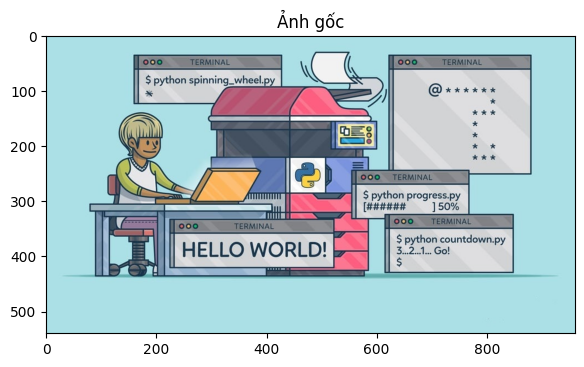

In [228]:
img_original = cv2.imread("Assets/Images/Input/Input.jpeg")
img = img_original.copy()
plt.subplot(1, 2, 1)
plt.imshow(img_original[:,:,::-1])
plt.title("Ảnh gốc")


In [229]:
# chuyển ảnh qua gray và dùng hàm canny để tìm viền của nó
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray, 40, 200)
# tim viền
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

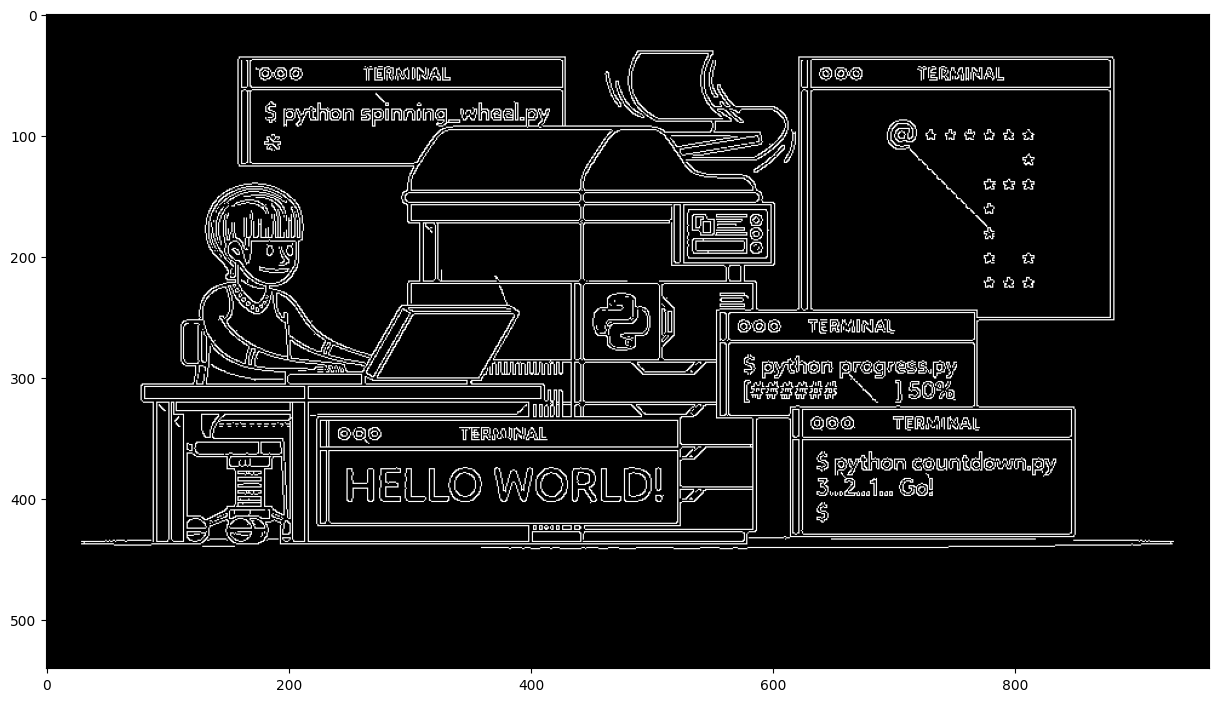

In [230]:
plt.imshow(edged, cmap="gray")

Text(0.5, 1.0, 'Easy Output')

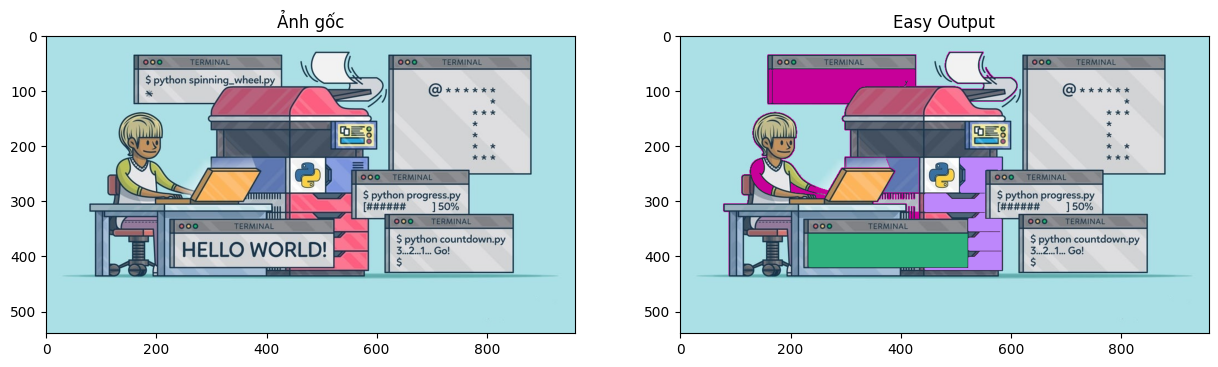

In [231]:
# Giá trị diện tích contours và số điểm khác nhau
mean_area = [10000, 5000, 2000]
no_Diff = [3, 5, 8]

# Tạo ảnh cho cấp độ dễ
img1 = img_original.copy()
# Fill màu vào các contour có diện tích >= 10000
accepted_contours = [cnt for cnt in contours if cv2.contourArea(cnt) >= mean_area[0] ]
accepted_contours = random.sample(accepted_contours, min(no_Diff[0], len(accepted_contours)))
for cnt in accepted_contours:
    cv2.fillPoly(img1, pts=[cnt], color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
cv2.imwrite("Assets/Images/Output/easy_output.jpeg", img1)
plt.subplot(1, 2, 1)
plt.imshow(img_original[:,:,::-1])
plt.title("Ảnh gốc")
plt.subplot(1, 2, 2)
plt.imshow(img1[:,:,::-1])
plt.title("Easy Output")
 


Text(0.5, 1.0, 'Medium Output')

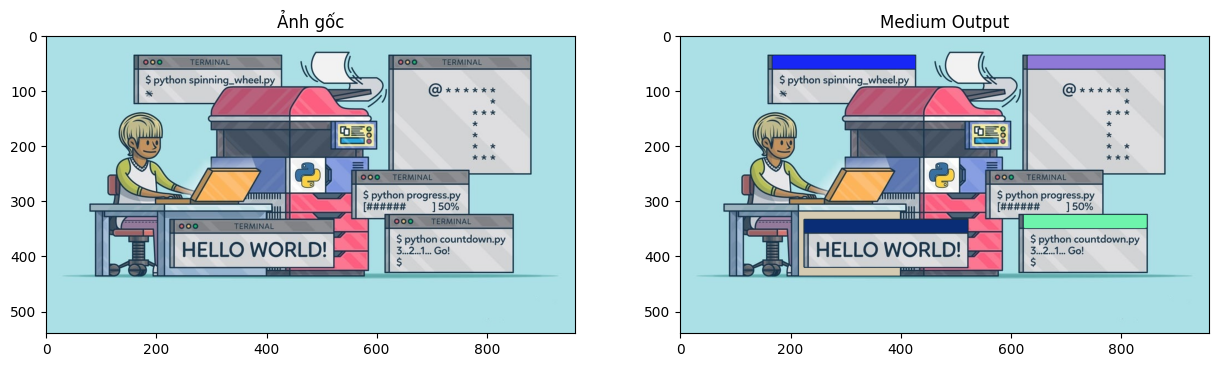

In [232]:
# Tạo ảnh cho cấp độ trung bình
img2 = img_original.copy()
# Fill màu vào các contour có có 5000 <= diện tích < 10000
accepted_contours = [cnt for cnt in contours if  cv2.contourArea(cnt) >= mean_area[1] and cv2.contourArea(cnt) < mean_area[0]]
accepted_contours = random.sample(accepted_contours, min(no_Diff[1], len(accepted_contours)))
for cnt in accepted_contours:
    cv2.fillPoly(img2, pts=[cnt], color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
cv2.imwrite("Assets/Images/Output/medium_output.jpeg", img2)
plt.subplot(1, 2, 1)
plt.imshow(img_original[:,:,::-1])
plt.title("Ảnh gốc")
plt.subplot(1, 2, 2)
plt.imshow(img2[:,:,::-1])
plt.title("Medium Output")

8


Text(0.5, 1.0, 'Hard Output')

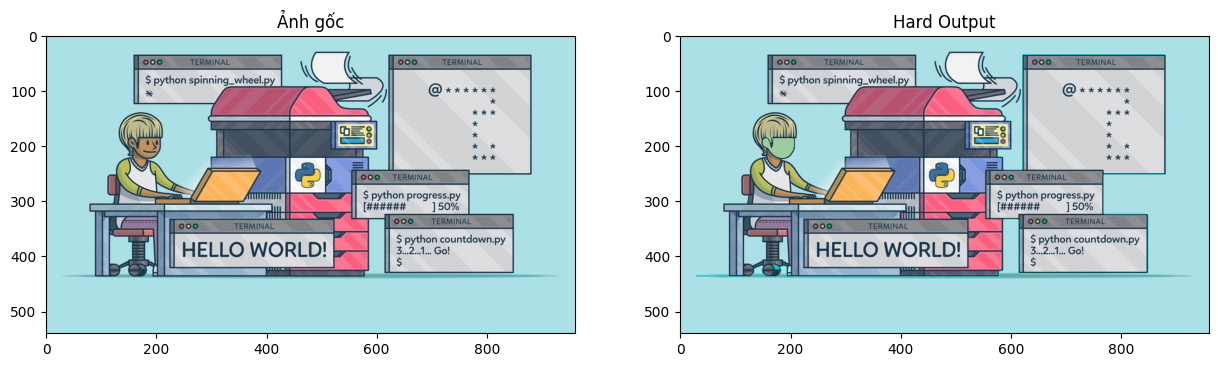

In [233]:
# Tạo ảnh cho cấp độ khó
img3 = img_original.copy()
# Fill màu vào các contour có có  diện tích < 2000
accepted_contours = [cnt for cnt in contours if cv2.contourArea(cnt) <= mean_area[2]]
accepted_contours = random.sample(accepted_contours, min(no_Diff[2], len(accepted_contours)))
print(len(accepted_contours))
for cnt in accepted_contours:
    cv2.fillPoly(img3, pts=[cnt], color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
cv2.imwrite("Assets/Images/Output/hard_output.jpeg", img3)
plt.subplot(1, 2, 1)
plt.imshow(img_original[:,:,::-1])
plt.title("Ảnh gốc")
plt.subplot(1, 2, 2)
plt.imshow(img3[:,:,::-1])
plt.title("Hard Output")